In [1]:
import cv2
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import joblib
import random

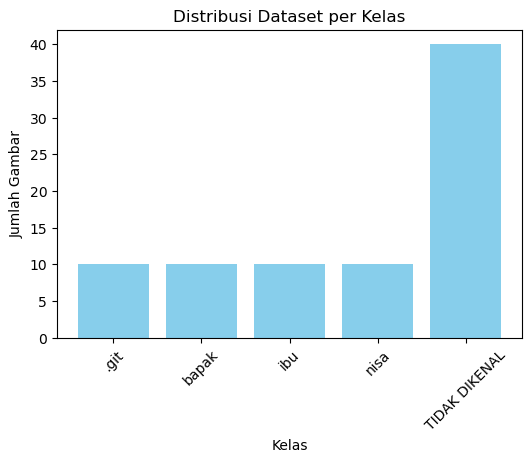

Distribusi dataset per kelas:
.git: 10 gambar
bapak: 10 gambar
ibu: 10 gambar
nisa: 10 gambar
TIDAK DIKENAL: 40 gambar


In [2]:
import os
import matplotlib.pyplot as plt

# Path dataset
dataset_path = r"C:\\Users\\ASUS\\OneDrive - Universitas Islam Indonesia\\KULIAH\\SEMESTER 6\\ARTIFICIAL INTELLIGNCE\\UAS_Copy"

# Hitung jumlah file per kelas
class_counts = {}
for class_name in os.listdir(dataset_path):
    class_dir = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_dir):
        count = len(os.listdir(class_dir))
        class_counts[class_name] = count

# Visualisasi distribusi dataset
plt.figure(figsize=(6, 4))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.title("Distribusi Dataset per Kelas")
plt.xlabel("Kelas")
plt.ylabel("Jumlah Gambar")
plt.xticks(rotation=45)
plt.show()

# Cetak distribusi
print("Distribusi dataset per kelas:")
for cls, count in class_counts.items():
    print(f"{cls}: {count} gambar")


In [3]:
# ======================
# Path dataset
# ======================
dataset_path = r"C:\\Users\\ASUS\\OneDrive - Universitas Islam Indonesia\\KULIAH\\SEMESTER 6\\ARTIFICIAL INTELLIGNCE\\UAS_Copy"

processed_faces = []
processed_labels = []

# ======================
# Haar Cascade untuk deteksi wajah
# ======================
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# ======================
# Fungsi Augmentasi
# ======================
def augment_image(image):
    augmented_images = []
    
    # Rotasi acak
    for angle in random.sample([-15, -10, 10, 15], 2):  # pilih 2 rotasi acak
        h, w = image.shape[:2]
        M = cv2.getRotationMatrix2D((w//2, h//2), angle, 1)
        rotated = cv2.warpAffine(image, M, (w, h))
        augmented_images.append(rotated)
    
    # Flipping horizontal
    flipped = cv2.flip(image, 1)
    augmented_images.append(flipped)
    
    return augmented_images

# ======================
# Preprocessing Dataset
# ======================
for person_name in os.listdir(dataset_path):
    person_dir = os.path.join(dataset_path, person_name)
    if not os.path.isdir(person_dir):
        continue
    
    for image_name in os.listdir(person_dir):
        image_path = os.path.join(person_dir, image_name)
        image = cv2.imread(image_path)
        
        if image is None:
            print(f"[WARNING] Gagal membaca gambar: {image_path}")
            continue
        
        # Noise Removal
        image = cv2.GaussianBlur(image, (3, 3), 0)
        
        # Grayscale untuk deteksi wajah
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        detected_faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)
        
        if len(detected_faces) == 0:
            print(f"[WARNING] Tidak ada wajah terdeteksi: {image_path}")
            continue
        
        for (x, y, w, h) in detected_faces:
            face_roi = image[y:y+h, x:x+w]
            
            # Resize & Normalisasi
            face_roi = cv2.resize(face_roi, (224, 224))
            face_roi = face_roi.astype("float32") / 255.0
            
            processed_faces.append(face_roi)
            processed_labels.append(person_name)
            
            # Augmentasi
            for aug in augment_image((face_roi * 255).astype("uint8")):
                aug_resized = cv2.resize(aug, (224, 224))
                aug_resized = aug_resized.astype("float32") / 255.0
                processed_faces.append(aug_resized)
                processed_labels.append(person_name)

print(f"[INFO] Preprocessing selesai. Total data: {len(processed_faces)} sampel")


[WARNING] Gagal membaca gambar: C:\\Users\\ASUS\\OneDrive - Universitas Islam Indonesia\\KULIAH\\SEMESTER 6\\ARTIFICIAL INTELLIGNCE\\UAS_Copy\.git\COMMIT_EDITMSG
[WARNING] Gagal membaca gambar: C:\\Users\\ASUS\\OneDrive - Universitas Islam Indonesia\\KULIAH\\SEMESTER 6\\ARTIFICIAL INTELLIGNCE\\UAS_Copy\.git\config
[WARNING] Gagal membaca gambar: C:\\Users\\ASUS\\OneDrive - Universitas Islam Indonesia\\KULIAH\\SEMESTER 6\\ARTIFICIAL INTELLIGNCE\\UAS_Copy\.git\description
[WARNING] Gagal membaca gambar: C:\\Users\\ASUS\\OneDrive - Universitas Islam Indonesia\\KULIAH\\SEMESTER 6\\ARTIFICIAL INTELLIGNCE\\UAS_Copy\.git\HEAD
[WARNING] Gagal membaca gambar: C:\\Users\\ASUS\\OneDrive - Universitas Islam Indonesia\\KULIAH\\SEMESTER 6\\ARTIFICIAL INTELLIGNCE\\UAS_Copy\.git\hooks
[WARNING] Gagal membaca gambar: C:\\Users\\ASUS\\OneDrive - Universitas Islam Indonesia\\KULIAH\\SEMESTER 6\\ARTIFICIAL INTELLIGNCE\\UAS_Copy\.git\index
[WARNING] Gagal membaca gambar: C:\\Users\\ASUS\\OneDrive - Univers

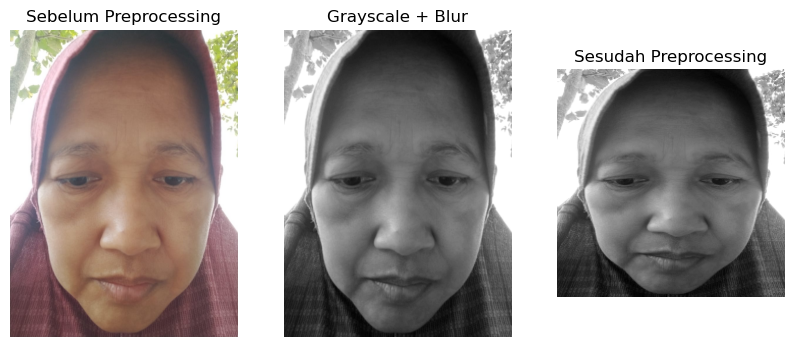

In [4]:
import cv2
import matplotlib.pyplot as plt
import random
import os

# Filter hanya folder (skip file seperti .pkl)
all_folders = [f for f in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, f))]

# Pilih folder acak
sample_folder = random.choice(all_folders)

# Pilih gambar acak dari folder tersebut
all_images = [img for img in os.listdir(os.path.join(dataset_path, sample_folder)) if img.lower().endswith(('.jpg', '.png', '.jpeg'))]
sample_image_name = random.choice(all_images)
sample_image_path = os.path.join(dataset_path, sample_folder, sample_image_name)

# Baca gambar asli
original_image = cv2.imread(sample_image_path)
original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

# ===== PREPROCESSING =====
# 1. Noise Removal
blurred_image = cv2.GaussianBlur(original_image, (3, 3), 0)

# 2. Grayscale
gray_image = cv2.cvtColor(blurred_image, cv2.COLOR_BGR2GRAY)

# 3. Resize
resized_image = cv2.resize(gray_image, (224, 224))

# 4. Normalisasi
normalized_image = resized_image.astype("float32") / 255.0

# ===== TAMPILKAN =====
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(original_image_rgb)
plt.title("Sebelum Preprocessing")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale + Blur")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(normalized_image, cmap='gray')
plt.title("Sesudah Preprocessing")
plt.axis("off")

plt.show()


In [5]:
# ======================
# FUNGSI EKSTRAKSI LBP
# ======================
def extract_lbp_features(image):
    """
    Prinsip LBP:
    - Membandingkan intensitas piksel pusat dengan tetangganya
    - Menghasilkan pola biner lokal
    - Dibuat histogram (fitur tekstur wajah)
    """
    lbp = cv2.cvtColor((image * 255).astype("uint8"), cv2.COLOR_BGR2GRAY)
    lbp_hist = cv2.calcHist([lbp], [0], None, [256], [0, 256])
    return lbp_hist.flatten()

# ======================
# UBAH DATA HASIL PREPROCESSING MENJADI FITUR LBP
# ======================
faces_lbp = [extract_lbp_features(img) for img in processed_faces]
faces_lbp = np.array(faces_lbp)
labels = np.array(processed_labels)

# ======================
# TRAINING MODEL SVM
# ======================
X_train, X_test, y_train, y_test = train_test_split(faces_lbp, labels, test_size=0.2, random_state=42)

svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)

print("[INFO] Akurasi Training:", svm_model.score(X_train, y_train))
print("[INFO] Akurasi Testing:", svm_model.score(X_test, y_test))

# Simpan model
joblib.dump(svm_model, "face_recognition_model.pkl")
print("[INFO] Model SVM tersimpan sebagai face_recognition_model.pkl")


[INFO] Akurasi Training: 1.0
[INFO] Akurasi Testing: 0.9696969696969697
[INFO] Model SVM tersimpan sebagai face_recognition_model.pkl


[INFO] Accuracy: 0.9697
[INFO] Precision: 0.9735
[INFO] Recall: 0.9697
[INFO] F1-Score: 0.9695

[INFO] Classification Report:

               precision    recall  f1-score   support

TIDAK DIKENAL       1.00      1.00      1.00        32
        bapak       0.88      1.00      0.93        14
          ibu       1.00      0.86      0.92        14
         nisa       1.00      1.00      1.00         6

     accuracy                           0.97        66
    macro avg       0.97      0.96      0.96        66
 weighted avg       0.97      0.97      0.97        66



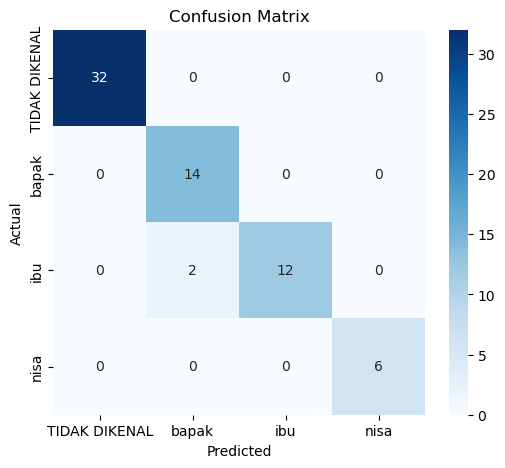

[INFO] Top-2 Accuracy: 0.9848


In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, top_k_accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# ======================
# PREDIKSI
# ======================
y_pred = svm_model.predict(X_test)

# ======================
# METRIK EVALUASI
# ======================
# Accuracy
acc = accuracy_score(y_test, y_pred)

# Precision, Recall, F1
precision = precision_score(y_test, y_pred, average='weighted')  # weighted karena multiclass
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"[INFO] Accuracy: {acc:.4f}")
print(f"[INFO] Precision: {precision:.4f}")
print(f"[INFO] Recall: {recall:.4f}")
print(f"[INFO] F1-Score: {f1:.4f}")

# Laporan Lengkap
print("\n[INFO] Classification Report:\n")
print(classification_report(y_test, y_pred))

# ======================
# CONFUSION MATRIX
# ======================
cm = confusion_matrix(y_test, y_pred, labels=svm_model.classes_)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ======================
# TOP-K ACCURACY (misalnya Top-2)
# ======================
y_proba = svm_model.predict_proba(X_test)
top2_acc = top_k_accuracy_score(y_test, y_proba, k=2)

print(f"[INFO] Top-2 Accuracy: {top2_acc:.4f}")


d:\DATA ENGINEER\envs\dateng\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
5 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "d:\DATA ENGINEER\envs\dateng\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\DATA ENGINEER\envs\dateng\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\DATA ENGINEER\envs\dateng\Lib\site-packages\sklearn\svm\_base.py", line 207, in fit
    y = self._

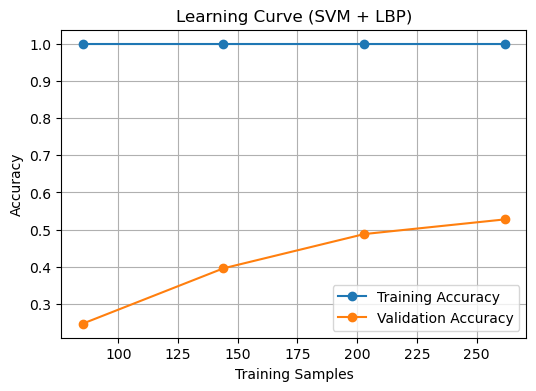

In [7]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    svm_model, faces_lbp, labels, cv=5, scoring='accuracy'
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_mean, 'o-', label='Training Accuracy')
plt.plot(train_sizes, test_mean, 'o-', label='Validation Accuracy')
plt.title("Learning Curve (SVM + LBP)")
plt.xlabel("Training Samples")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()


In [ ]:
# ======================
# LOAD MODEL SVM
# ======================
svm_model = joblib.load("face_recognition_model.pkl")
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# ======================
# FUNGSI EKSTRAKSI LBP
# ======================
def extract_lbp_features(image):
    lbp = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    lbp_hist = cv2.calcHist([lbp], [0], None, [256], [0, 256])
    return lbp_hist.flatten()

# ======================
# REAL-TIME PREDICTION
# ======================
cap = cv2.VideoCapture(0)  # kamera default
confidence_threshold = 70  # threshold untuk Unknown

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    detected_faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=5)

    for (x, y, w, h) in detected_faces:
        face_roi = frame[y:y+h, x:x+w]
        face_roi_resized = cv2.resize(face_roi, (224, 224))
        face_roi_normalized = face_roi_resized.astype("float32") / 255.0

        # Ekstraksi fitur LBP
        features = extract_lbp_features((face_roi_normalized * 255).astype("uint8")).reshape(1, -1)

        # Prediksi kelas & probabilitas
        prediction = svm_model.predict(features)[0]
        confidence = svm_model.predict_proba(features).max() * 100

        # Label Nama atau "Tidak Dikenal"
        if confidence < confidence_threshold:
            label_text = f"Tidak Dikenal ({confidence:.1f}%)"
            color = (0, 0, 255)  # merah
        else:
            label_text = f"{prediction} ({confidence:.1f}%)"
            color = (0, 255, 0)  # hijau

        # Kotak + Label
        cv2.rectangle(frame, (x, y), (x+w, y+h), color, 2)
        cv2.putText(frame, label_text, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, 2)

    cv2.imshow("Face Recognition Real-Time", frame)

    # Tekan Q untuk keluar
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
